## LINEAR REGRESSION 
Concep
- Fit a line to data set of observation
- Using the line to *predict* unobserved values.
- This regression is not time dependency guys


## How does it work?
- Usually using OLS "Ordinary Least Square". OLS minimizes the sum of squared errors = maximizing likelihood of the observed data.
- This regression minimizes square error between each poin and the line
- Slope-intercept equation of line : y=mx+b
- **Slope (m)**  is correlation between 2 variables times standar deviation in Y, all devided by stdev in X
    - m = (Y2-Y1)/(X2-X1)
    - b means where the line begins, b= y - intercept
- **Intercept** is the mean(average) of Y minus Slope  times mean of X

mathwarehouse.com/algebra/linear_equation/slope-intercept-form.php

- We can use Gradient decent as alternative method to least squares.

## How do I know my model is good?
- Measure your error with **r-squared ( coefficient of determination)**

#### Interpreting r-square
    - range from 0-1
    - 0 is bad,1 is good(it means all of the variance captured)



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Read Data
df = pd.read_csv('headbrain.csv')
print(df.shape)
df.head()

# Data from https://www.kaggle.com/jemishdonda/headbrain?select=headbrain.csv

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


As you can see we have 237 observations and 4 features

In [3]:
#Collect X and Y
X = df['Head Size(cm^3)'].values #feature
Y = df['Brain Weight(grams)'].values #target

In [7]:
#Calculate Mean X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
m = len(X)

In [8]:
#Using formula calculate b1 and b0

number = 0
denom = 0
for i in range(m):
        number+= (X[i]-mean_x)*(Y[i]-mean_y)
        denom += (X[i]-mean_x)**2
b1 = number / denom      # Slope
b0 = mean_y -(b1*mean_x)

#Print the coefficients
print(b1,b0)

0.26342933948939945 325.57342104944223


Our formula **y = mx+b**
from the result above 
we can say that 
m (brain weight) = 0,263
b (headsize) = 325,573


#### Ploting Value and Regression Line

In [9]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#Calculate Line value x and y
x = np.linspace(min_x, max_x,1000)
y = b1*x + b0

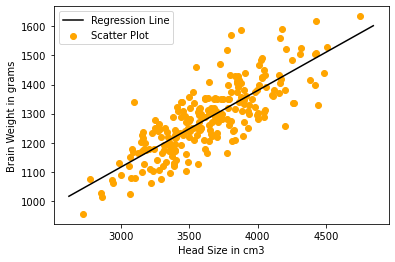

In [10]:
#Ploting line
plt.plot(x,y, color='black', label='Regression Line')

#Plot Scatter points
plt.scatter(X,Y, color='orange', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

### Find out how good is our model

In [13]:
#Calculate R-Square Value
ss_t = 0  
ss_r = 0
for i in range(m) :
    y_pred = b1*X[i] + b0
    ss_t += (Y[i]- mean_y)** 2
    ss_r += (Y[i]- y_pred)** 2
r2 = 1-(ss_r/ss_t) # R-square
print(r2)

0.6393117199570003


As we can se above our R-square = 0,639 , it's quite good enough model

## Now Let's try Linear Regression Using Scikitlearn

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Can't use Rank 1 matrix in scikit learn
X =X.reshape((m,1))

#Creating model
reg = LinearRegression()

#Fitting training data
reg = reg.fit(X,Y)

#Y Prediction
Y_pred = reg.predict(X)

In [16]:
#Calculate R-square Score
r2_score = reg.score(X,Y)
print(r2_score)

0.639311719957


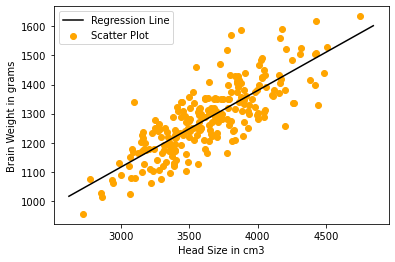

In [17]:
#Ploting line
plt.plot(x,y, color='black', label='Regression Line')

#Plot Scatter points
plt.scatter(X,Y, color='orange', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()